In [1]:
import numpy as np
import pandas as pd
import os
import random

In [2]:
layer_weight_dims = [19200,20,10,1]
layer_bias_dims = [20,10,1]

In [3]:
a = np.mgrid[0:256:19200j]

In [4]:
a = a.reshape((-1,1)).astype('uint8')

In [5]:
np.random.shuffle(a)

In [6]:
b = a.reshape((80,80,3))

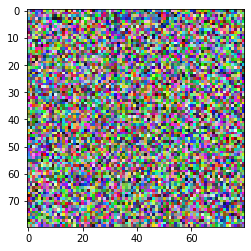

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

PIL_image = Image.fromarray(b)
plt.imshow(PIL_image)
plt.show()

In [171]:
MODEL_PATH = "./X_train.data"

f = open(MODEL_PATH,"r")
data = f.read()
f.close()

layer1_weight = data.split(" ")[12288:12288*2]
layer1_weight = np.array(layer1_weight).astype(float)
layer1_weight.shape

(12288,)

In [172]:
layer1_weight = layer1_weight * 255

In [173]:
layer1_weight = layer1_weight.astype('uint8')

In [174]:
layer1_weight = layer1_weight.reshape((12288,1))
test = layer1_weight

In [175]:
layer1_weight = layer1_weight.T

In [176]:
layer1_weight[0].shape

(12288,)

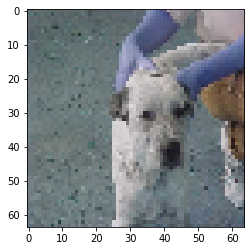

ValueError: cannot reshape array of size 12288 into shape (80,80)

In [177]:
final_image = np.zeros((12288,1))
for images in layer1_weight:
    temp = images.reshape((-1,1))
    temp_image = Image.fromarray(temp.reshape((64,64,3)).astype('uint8'))
    plt.imshow(temp_image)
    plt.show()
    final_image = np.add(final_image,temp)


#div_factor = np.array([[20]])
#final_image = np.divide(final_image,div_factor).astype('uint8')
final_image = final_image.reshape((80,80)).astype('uint8') 

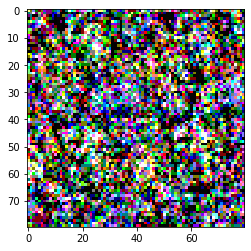

In [162]:
PIL_image = Image.fromarray(final_image)
plt.imshow(PIL_image)
plt.show()

In [112]:
layer2_weights = data.split(" ")[384001:384201]

In [113]:
layer2_weights = np.array(layer2_weights).reshape((-1,1)).astype(float)

In [114]:
layer2_weights.shape

(200, 1)

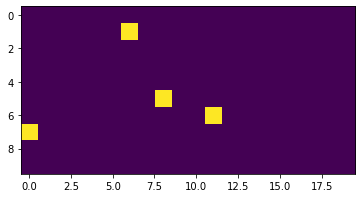

In [116]:
layer2_weights = layer2_weights > 0.5
layer2_weights = layer2_weights.reshape((10,20)).astype("uint8")
PIL_image = Image.fromarray(layer2_weights)
plt.imshow(PIL_image)
plt.show()